<font face="Times New Roman">
<div dir=ltr align=center>
<font color=3C99D size=8>
Linear Regression and Regularization

## Overview
<font face="Arial" size=4><br>
We want to train a model which estimates obesity levels based on eating habits and physical conditions of an individual. For our purpose, we will use a dataset of individuals from the countries of Mexico, Peru and Columbia.  
The dataset was collected by Fabio Mendoza Palechor and ALexis de la Hoz Manotas.

## Description 
<font face="Arial" size=4><br>
This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III. 77% of the data was generated synthetically using the Weka tool and the SMOTE filter, 23% of the data was collected directly from users through a web platform.

## Packages and Dataset

In [1]:
# Import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import seaborn as sns

In [2]:
# Read the dataset
df = pd.read_csv('./dataset_bmi.csv')
print(df.shape)
df.head()

(2111, 17)


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,18.9
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,22.7
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,21.6
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,28.0
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,26.6


#### Creating NObesity label

In [3]:
### base on maximum BMI = 48.5 and BMI greater than 30 is obesity
def obesity_level(w):
  if w < 18.5:
    return 'InW'
  if 18.5 <= w <= 24.9:
    return 'NW'
  if 25 <= w <= 27.45:
    return 'OW1'
  if 27.45 < w <= 29.9:
    return 'OW2'
  if 30 <= w < 36.5:
    return 'OB1'
  if 36.5 <= w < 43:
    return 'OB2'
  if w >= 43:
    return 'OB3'

In [4]:
df['NObesity'] = df['BMI'].apply(obesity_level)

## Split the Data  
<font face="Arial" size=4><br>
Spliting the data to training (80 percent) and test (20 percent) sets using Stratified Sampling on `BMI` column.

In [5]:
y = 'BMI'
X = df.loc[:, (df.columns != y) & (df.columns != 'NObesity')].columns
X_train, X_test, y_train, y_test = train_test_split(df[X], df[y], test_size = 0.2, stratify=df['NObesity'], random_state=1)

## Exploratory Data Analysis

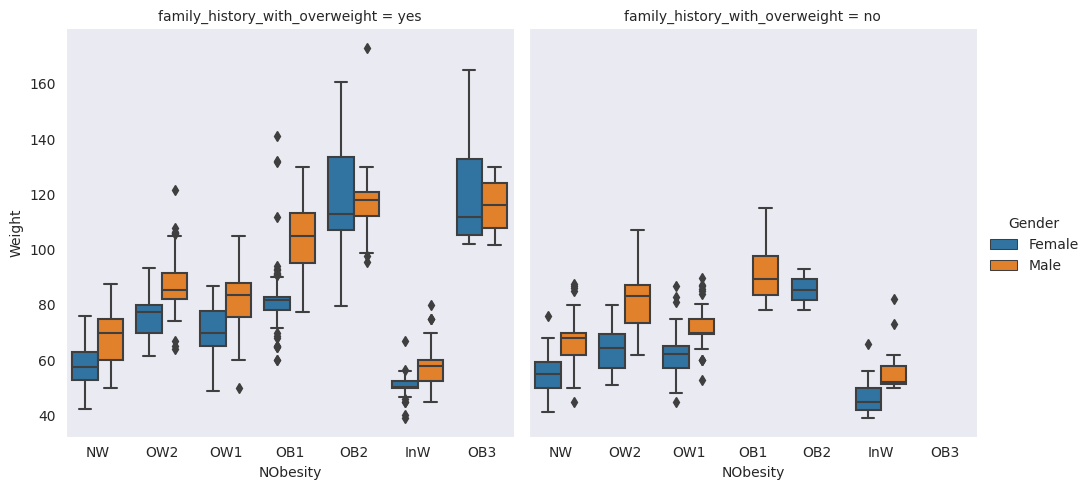

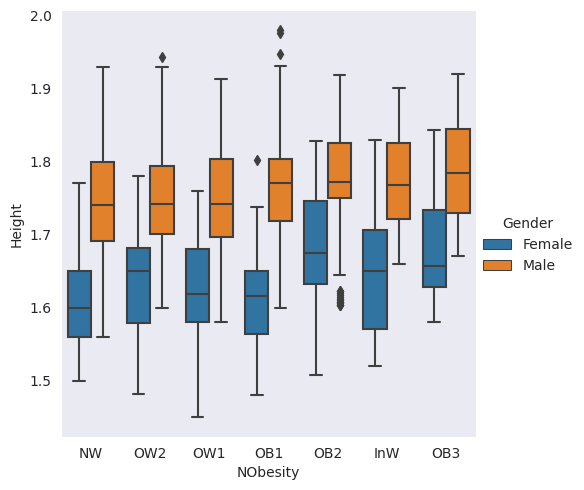

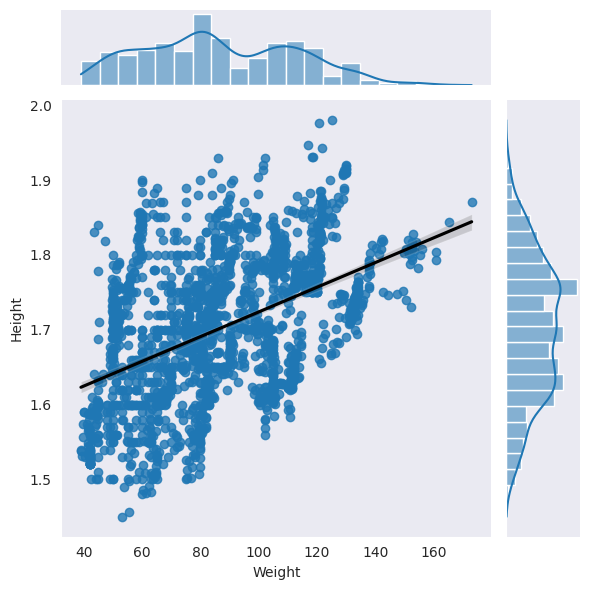

In [6]:
%matplotlib inline
sns.set_style('dark')
sns.catplot(data=df, x='NObesity', y='Weight', col='family_history_with_overweight', hue='Gender', kind='box')
sns.catplot(data=df, x='NObesity', y='Height', hue='Gender', kind='box')
sns.jointplot(data=df, x='Weight', y='Height', kind='reg', joint_kws={'line_kws':{'color':'black'}})

Based on Height distribution for NObesity we can assume all data points are coming from close distributions for each gender.

In [7]:
print('Number of NaN entries')
print(df.isnull().values.sum())
print('Statistics about each attribute')
print(X_train.describe())
X_train.corr(method='pearson')

Number of NaN entries
0
Statistics about each attribute
               Age       Height       Weight         FCVC          NCP  \
count  1688.000000  1688.000000  1688.000000  1688.000000  1688.000000   
mean     24.446445     1.701726    86.474731     2.422040     2.693376   
std       6.444049     0.092849    25.940145     0.534410     0.774350   
min      16.000000     1.456346    39.000000     1.000000     1.000000   
25%      20.000000     1.628706    65.978172     2.000000     2.663309   
50%      22.841336     1.700172    83.000000     2.392422     3.000000   
75%      26.000000     1.769284   106.116558     3.000000     3.000000   
max      61.000000     1.980000   160.935351     3.000000     4.000000   

              CH2O          FAF          TUE  
count  1688.000000  1688.000000  1688.000000  
mean      2.003168     0.994557     0.665437  
std       0.614998     0.844119     0.606899  
min       1.000000     0.000000     0.000000  
25%       1.550943     0.115201     0.0000

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
Age,1.000000,-0.034379,0.199061,0.007007,-0.036781,-0.031253,-0.111759,-0.300161
Height,-0.034379,1.000000,0.453276,-0.042455,0.237566,0.217931,0.284965,0.066154
Weight,0.199061,0.453276,1.000000,0.207608,0.105477,0.215105,-0.048437,-0.070964
FCVC,0.007007,-0.042455,0.207608,1.000000,0.043474,0.065773,0.027643,-0.103458
NCP,-0.036781,0.237566,0.105477,0.043474,1.000000,0.068604,0.114969,0.008644
CH2O,-0.031253,0.217931,0.215105,0.065773,0.068604,1.000000,0.169353,0.018457
FAF,-0.111759,0.284965,-0.048437,0.027643,0.114969,0.169353,1.000000,0.044064
TUE,-0.300161,0.066154,-0.070964,-0.103458,0.008644,0.018457,0.044064,1.000000


## Data Cleaning and Manipulation  

Transforming all categorical attributes to numerical attributes using ordinal encoders or one-hot encoders.

In [8]:
### ordinal
# np.unique(df['CAEC'].values)
### ordianl
# np.unique(df['CALC'].values)
### one-hot
# np.unique(df['MTRANS'].values)

In [9]:
data = pd.concat([X_train.assign(ind='train'), X_test.assign(ind='test')])

ordinal_encoder = OrdinalEncoder()
encoded = ordinal_encoder.fit_transform(data[['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC', 'CAEC', 'CALC']])
data[['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC', 'CAEC', 'CALC']] = encoded
# gender_mapper = {'Female':1, 'Male':0}
# binary_mapper = {'yes':1, 'no':0}
# ordinal_mapper = {'Always':3, 'Frequently':2, 'Sometimes':1, 'no':0}
# MTRANS_mapper = {'Automobile':'00001', 'Bike':'00010', 'Motorbike':'00100', 'Public_Transportation':'01000', 'Walking':'10000'}
# data['Gender'] = data['Gender'].replace(gender_mapper)
# data['family_history_with_overweight'] = data['family_history_with_overweight'].replace(binary_mapper)
# data['FAVC'] = data['FAVC'].replace(binary_mapper)
# data['SMOKE'] = data['SMOKE'].replace(binary_mapper)
# data['SCC'] = data['SCC'].replace(binary_mapper)
# data['CAEC'] = data['CAEC'].replace(ordinal_mapper)
# data['CALC'] = data['CALC'].replace(ordinal_mapper)

data['MTRANS'] = data['MTRANS'].astype('category')
data['Enc_MTRANS'] = data['MTRANS'].cat.codes
enc=OneHotEncoder()
enc_data=pd.DataFrame(enc.fit_transform(data[['Enc_MTRANS']]).toarray())
data = data.join(enc_data)
data.columns = data.columns.astype(str)

X_train, X_test = data[data["ind"].eq("train")], data[data["ind"].eq("test")]

<Axes: >

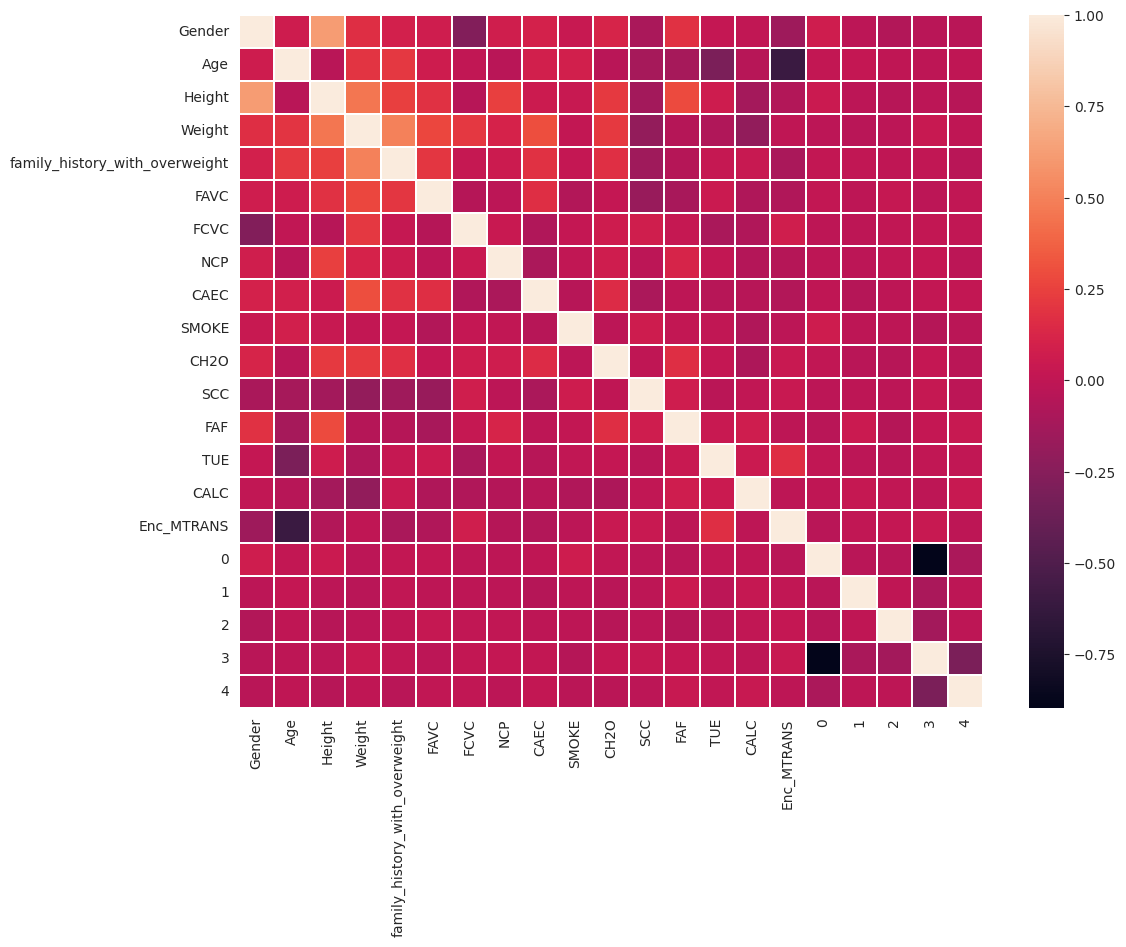

In [10]:
corr_matrix = X_train.corr(method='pearson')
plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix, linewidths=0.1)

In [11]:
data = pd.concat([X_train.assign(ind='train'), X_test.assign(ind='test')])

### based on heatmap, weight and height have good correlation so we can define a ratio to reduce dimention of data by one
data['height_weight_ratio'] = data['Height'] / data['Weight']

### here we're adding overall feature that shows how healthy a person eats and how much they have physical activity
# data['eating_habbit'] = data['FCVC'] - 0.3*data['CAEC'] - 0.2*data['CALC'] - 0.5*data['FAVC']
### 0 is walking and 1 is biking
data['overall'] = 0.212*data['FCVC'] - 0.35*data['CAEC'] - 0.25*data['CALC'] - 0.215*data['FAVC'] + data['0'] + data['1']

In [12]:
new_data = data.drop(labels=['MTRANS', 'Enc_MTRANS'], axis=1)

## Pipeline

In [13]:
df = pd.read_csv('./dataset_bmi.csv')
df['NObesity'] = df['BMI'].apply(obesity_level)
y = 'BMI'
X = df.loc[:, (df.columns != y) & (df.columns != 'NObesity')].columns
X_train, X_test, y_train, y_test = train_test_split(df[X], df[y], test_size = 0.2, stratify=df['NObesity'], random_state=0)

In [14]:
from sklearn.base import BaseEstimator, TransformerMixin

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
  def fit(self, X):
    return self
  def ordinal_map(self, X):
    binary_mapper = {'yes':1, 'no':0}
    ordinal_mapper = {'Always':3, 'Frequently':2, 'Sometimes':1, 'no':0}
    X['FAVC'] = X['FAVC'].replace(binary_mapper)
    X['CAEC'] = X['CAEC'].replace(ordinal_mapper)
    X['CALC'] = X['CALC'].replace(ordinal_mapper)
    return X
  def transform(self, X):
    X = self.ordinal_map(X)
    height_weight_ratio = X['Height'] / X['Weight']
    eating_habbit = 0.212*X['FCVC'] - 0.35*X['CAEC'] - 0.25*X['CALC'] - 0.215*X['FAVC']
    return np.c_[height_weight_ratio, eating_habbit]

class Mock(BaseEstimator, TransformerMixin):
  def fit(self, X):
    return self
  def transform(self, X):
    return X

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

ord_step = [('ord', OrdinalEncoder())]
pipe_ord = Pipeline(ord_step)

onehot_step = [('one', OneHotEncoder())]
pipe_onehot = Pipeline(onehot_step)

### Scaler is making prediction worse, so we're going to skip this step 
# num_step = [('scale', StandardScaler())]
num_step = [('scale', Mock())]
pipe_num = Pipeline(num_step)

add_step = [('attr_addition', CombinedAttributesAdder())]
pipe_add = Pipeline(add_step)

numerical_vars = X_train.select_dtypes('number').columns.tolist()
categorical_vars = X_train.select_dtypes('object').columns.tolist()
ordinal = list(filter(lambda x: x != 'MTRANS', categorical_vars))
onehot = ['MTRANS']
combination = ['Height', 'Weight', 'FCVC', 'CAEC', 'CALC', 'FAVC']

full_pipe = ColumnTransformer(transformers=[
          ('numbers', pipe_num, numerical_vars),
          ('ordinals', pipe_ord, ordinal),
          ('one-hot', pipe_onehot, onehot),
          ('combine', pipe_add, combination)])

In [16]:
prepared_train_data = full_pipe.fit_transform(X_train)

## Principal Component Analysis

In [17]:
### for non-pipeline data
# X_train, X_test = new_data[new_data["ind"].eq("train")], new_data[new_data["ind"].eq("test")]

# X_train = X_train.drop(labels='ind', axis=1)
# X_test = X_test.drop(labels='ind', axis=1)

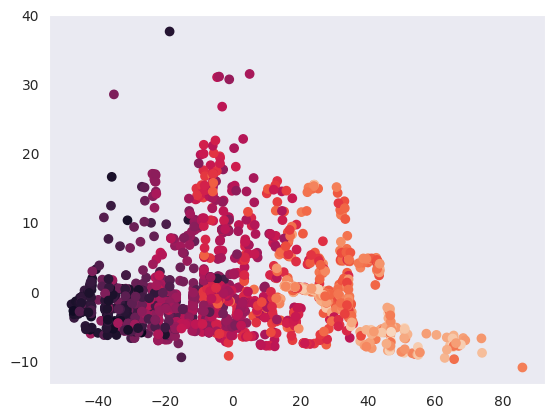

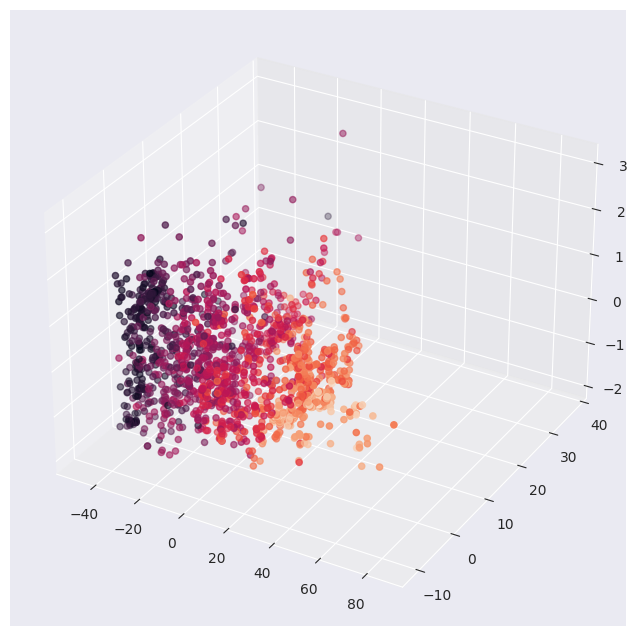

In [18]:
pca = PCA(n_components=10, svd_solver='full')

### for pipeline data
new_X_train = pca.fit_transform(prepared_train_data)

### for non-pipeline data
# new_X_train = pca.fit_transform(X_train)
# new_X_test = pca.fit_transform(X_test)

plt.scatter(new_X_train[:,0], new_X_train[:,1], c=y_train)
plt.show()
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(new_X_train[:,0], new_X_train[:,1], new_X_train[:,2], c=y_train)
plt.show()

## Model Training  
<font face="Arial" size=4><br>
Training a <code>linear regression</code> model and its regularized forms (<code>ridge</code> and <code>lasso</code>) on training data. Cross-validating the models using <code>10 fold CV</code>.

### Linear Regression

In [19]:
def display_scores(score):
    print("Scores:", score)
    print("Mean:", score.mean())
    print("Standard deviation:", score.std())

### Normal Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

lreg = LinearRegression()
lreg.fit(new_X_train, y_train)

scores = cross_val_score(lreg, new_X_train, y_train, scoring="neg_mean_squared_error", cv=10)
display_scores(-scores)

Scores: [12.45115855 11.03103673 10.31122336 12.27840919  9.74898724 11.58382746
 11.5983577  11.49807643 12.95563162 11.61412669]
Mean: 11.507083497519343
Standard deviation: 0.9142142592797471


### Ridge Regression

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge

rdg = Ridge(alpha = 0.5)
rdg.fit(new_X_train, y_train)

scores = cross_val_score(rdg, new_X_train, y_train, scoring="neg_mean_squared_error", cv=10)

display_scores(-scores)

Scores: [12.4509128  11.031184   10.31044445 12.27850514  9.74990202 11.5834948
 11.59643656 11.49849433 12.9548359  11.6153344 ]
Mean: 11.506954440114004
Standard deviation: 0.9139813315813128


### Lasso Regression

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0.1)
lasso.fit(new_X_train, y_train)

### Using GridSearchCV to find the best hyperparameter between those given
parameters = {'alpha': [0.1, 0.5, 1, 2]}
grid_cv = GridSearchCV(lasso, parameters)
grid_cv.fit(new_X_train, y_train)
print(grid_cv.cv_results_)

# scores = cross_val_score(lasso, new_X_train, y_train, scoring="neg_mean_squared_error", cv=10)
# display_scores(-scores)

{'mean_fit_time': array([0.00548277, 0.00706615, 0.00112805, 0.00116563]), 'std_fit_time': array([3.93708233e-03, 1.28865069e-03, 3.80137023e-05, 6.20890687e-05]), 'mean_score_time': array([0.00062709, 0.00074134, 0.00050731, 0.0004878 ]), 'std_score_time': array([8.41817346e-05, 1.26873510e-04, 1.44367519e-05, 9.91087422e-06]), 'param_alpha': masked_array(data=[0.1, 0.5, 1, 2],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'alpha': 0.1}, {'alpha': 0.5}, {'alpha': 1}, {'alpha': 2}], 'split0_test_score': array([0.81624136, 0.77764066, 0.75738607, 0.74193257]), 'split1_test_score': array([0.84241428, 0.81774399, 0.80561294, 0.79243321]), 'split2_test_score': array([0.8419554 , 0.80839402, 0.79234179, 0.7809364 ]), 'split3_test_score': array([0.84130882, 0.82212212, 0.811083  , 0.80023231]), 'split4_test_score': array([0.83250897, 0.80394965, 0.79185569, 0.77904809]), 'mean_test_score': array([0.83488576, 0.80597009, 0.791655

## Final Report

In [23]:
prepared_test_data = full_pipe.transform(X_test)
new_X_test = pca.transform(prepared_test_data)

print('Final Model')
print('Simple Linear Regression Score: ', lreg.score(new_X_test, y_test))
y_pred = lreg.predict(new_X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('Simple Linear Regression MSE: ', rmse)

print('Ridge Score: ', rdg.score(new_X_test, y_test))
y_pred = rdg.predict(new_X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('Ridge MSE: ', rmse)

print('Lasso Score: ', lasso.score(new_X_test, y_test))
y_pred = lasso.predict(new_X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('Lasso MSE: ', rmse)


Final Model
Simple Linear Regression Score:  0.857521178245018
Simple Linear Regression MSE:  3.204097925869261
Ridge Score:  0.8575185183706018
Ridge MSE:  3.20412783367668
Lasso Score:  0.8552939987667956
Lasso MSE:  3.229043491992083
